# Weekly Asignement

## Introduction

"What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment." From kaggle

It's intresting to know and understand human psychology and their behaviors. The findings can be used in other fileds like marketing, Public Administration...

## Data cleaning
describe any data cleaning steps

In [79]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px

df1 = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")  #'utf-8' codec can't decode so use  "ISO-8859-1"
df1.head()
list(df1.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

In [80]:
df = df1[['gender','wave','partner','match', 'samerace','career','age','go_out','exercise','attr','like']]
df = df.dropna() 
df.head()

,gender,wave,partner,match,samerace,career,age,go_out,exercise,attr,like
0,0,1,1,0,0,lawyer,21.0,1.0,8.0,6.0,7.0
1,0,1,2,0,0,lawyer,21.0,1.0,8.0,7.0,7.0
2,0,1,3,1,1,lawyer,21.0,1.0,8.0,5.0,7.0
3,0,1,4,1,0,lawyer,21.0,1.0,8.0,7.0,7.0
4,0,1,5,1,0,lawyer,21.0,1.0,8.0,5.0,6.0


In [81]:
# lets focus our study on the yough/ teenagers
#df = df[df['age']<25]
df['age'].value_counts()

27.0    1026
23.0     877
24.0     834
25.0     819
26.0     812
28.0     715
22.0     645
29.0     572
30.0     550
21.0     285
32.0     203
33.0     158
34.0     150
31.0     125
35.0      59
20.0      45
36.0      45
42.0      20
39.0      18
38.0      18
19.0      17
18.0      10
37.0       5
55.0       5
Name: age, dtype: int64

## Exploratory data analysis 
present relevant grahs and tables with respect to your problem

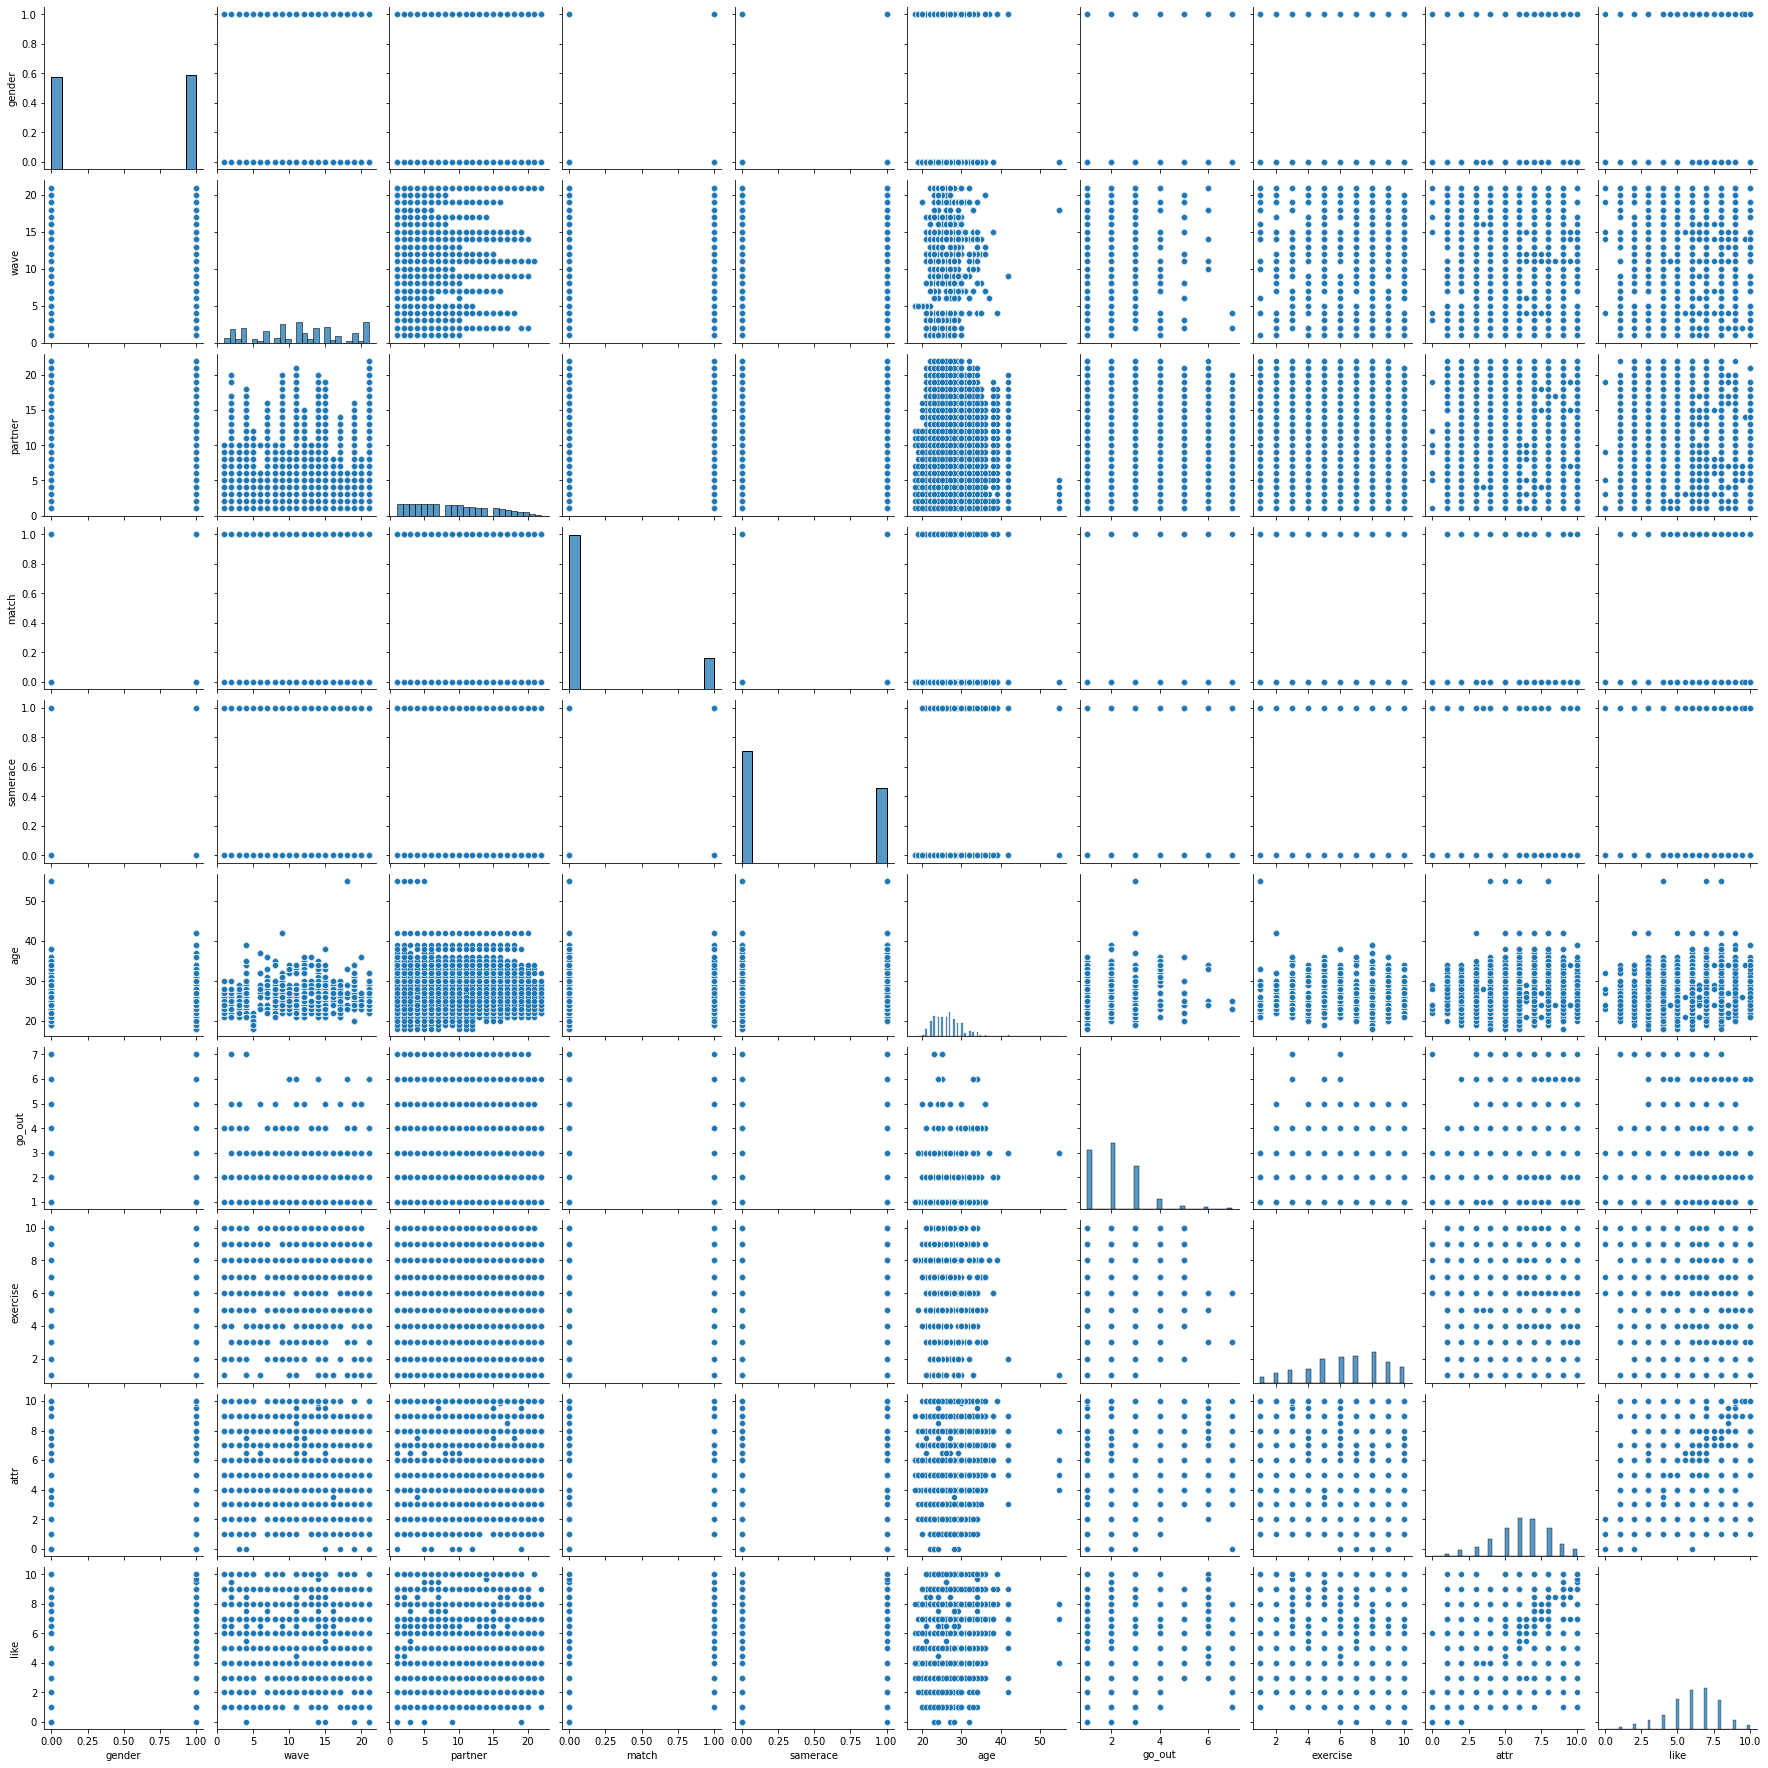

In [82]:
# scatterplot matrix of the numerical variables
sns.pairplot(df)
plt.show()

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


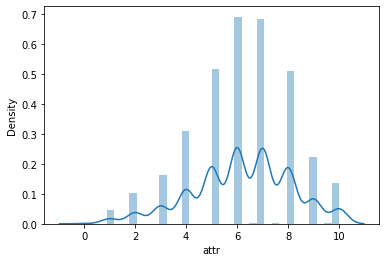

C:\Users\nirva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


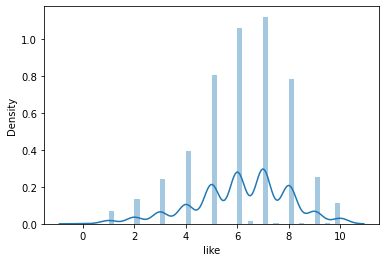

In [83]:
#there is someting intresting about attractivenes(attr) and like. We should have a closer look.

sns.distplot(df['attr'])
plt.show()
sns.distplot(df['like'])
plt.show()

In [84]:
# correlation matrix of the numerical variables
corr = df.corr()
corr

,gender,wave,partner,match,samerace,age,go_out,exercise,attr,like
gender,1.000000,-0.000002,0.012286,-0.002449,-0.003584,0.071900,0.015855,-0.090264,0.136819,0.074047
wave,-0.000002,1.000000,0.085608,-0.010465,-0.020327,0.094875,0.031166,-0.012744,-0.028262,-0.048550
partner,0.012286,0.085608,1.000000,0.000534,-0.015961,0.000647,0.027294,-0.026701,0.029133,0.001751
match,-0.002449,-0.010465,0.000534,1.000000,0.012679,-0.035414,-0.061742,0.006903,0.257747,0.303163
samerace,-0.003584,-0.020327,-0.015961,0.012679,1.000000,0.004679,-0.074559,0.039675,0.048413,0.040484
age,0.071900,0.094875,0.000647,-0.035414,0.004679,1.000000,0.085228,-0.034823,0.038927,0.026294
go_out,0.015855,0.031166,0.027294,-0.061742,-0.074559,0.085228,1.000000,-0.082317,0.038422,0.000654
exercise,-0.090264,-0.012744,-0.026701,0.006903,0.039675,-0.034823,-0.082317,1.000000,-0.034813,0.021238
attr,0.136819,-0.028262,0.029133,0.257747,0.048413,0.038927,0.038422,-0.034813,1.000000,0.664939
like,0.074047,-0.048550,0.001751,0.303163,0.040484,0.026294,0.000654,0.021238,0.664939,1.000000


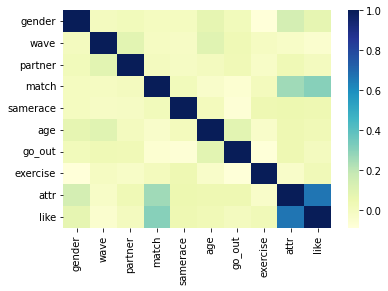

In [85]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

We can identify a strong corr betewn attr and like. 

## Predictive model

Lets use K-nearest neighbors as our prediction model


In [98]:
df['gender'].value_counts()
df['match'].value_counts()


0    6660
1    1353
Name: match, dtype: int64

K Nearest Neighbour is a basic algorithm that maintains all available examples and classifies fresh data or cases based on a similarity metric. It is usually used to classify a data point based on how its neighbors are categorised.

Spliting the data seting into a training and test set


In [99]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = df[['gender','wave','partner','like', 'samerace','age','go_out','exercise','attr']] #create the X matrix
X = X.dropna() 
X = normalize(X) #normalize the matrix to put everything on the same scale
import numpy as np
y = np.asarray(df['match'], dtype="|S6")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables


In [100]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data


## Evaluation


In [101]:
knn.score(X_test, y_test) #calculate the fit on the test data

0.800332778702163

In [102]:
6660 / (6660 + 1353)

0.8311493822538375

Accuracy is 82.8%.
That would give us 6660 / (6660 + 1353) = 83.1% 
the model is a lot better than the baseline guess.

In [103]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[1849,  119],
       [ 361,   75]], dtype=int64)

In [104]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['match','like'], columns = ['match','like']) 
conf_matrix

,match,like
match,1849,119
like,361,75
